## implimentation of example gived in Gmail (solution TD1)

### Define Data

In [41]:
import numpy as np
import matplotlib.pylab as plt 

inputs = np.array([0.1 , 0.3])

weight = np.array([0.5 , 0.2])

bias = np.array([1.83])

real_output = np.array([0.03])


### Define our function

1) activation function 

In [42]:
def activation (sum):
    return  1/(1 + np.exp(-sum)) 

2) function that calculate the weighted sum of input plus bias 

In [43]:
def model (inputs ,weight ,bias):
    sum = np.dot(inputs,weight ) + bias
    return sum

3) calculating the output using the nueral network

In [44]:
predicted_output = activation(model(inputs , weight , bias))
predicted_output

array([0.87435214])

3) calculating the error 

In [45]:
def calculate_error (predicted_output , real_output):
    return ((real_output - predicted_output)**2)/2

In [46]:
error = calculate_error(predicted_output , real_output)
error

array([0.35646527])

4) calculate the gradiant dw and db

In [47]:
def gradient(inputs , weight , bias ,  predicted_output ,  real_output  ):
    dw = (predicted_output -real_output) * (np.exp(model(inputs , weight , bias))/(1+np.exp(model(inputs , weight , bias)))**2) * inputs.T
    db = (predicted_output -real_output) * (np.exp(model(inputs , weight , bias))/(1+np.exp(model(inputs , weight , bias)))**2)
    return dw , db

In [48]:
dw , db =gradient(inputs , weight , bias , predicted_output , real_output)
print(f"dw1 = {dw[0]} , dw2 = {dw[1]} and db = {db}")

dw1 = 0.009276092558183863 , dw2 = 0.027828277674551587 and db = [0.09276093]


5) update the weight and the bias

In [49]:
def update (dw , db , weight , bias , learning_rate):
    if dw.ndim == 1:
        weight = weight.astype(float) - learning_rate * dw
        bias = bias.astype(float) - (learning_rate * db)
    else:
        weight = weight.astype(float) - learning_rate * np.sum(dw, axis=-1)
        bias = bias.astype(float) - (learning_rate * np.sum(db, axis=-1))
    
    return weight, bias

In [50]:
update(dw ,db ,weight ,bias , 0.01)

(array([0.49990724, 0.19972172]), array([1.82907239]))

6) combine all the privious step and repeat it by certain number which is called epoch number 

In [51]:
def artificial_nueral(inputs , weight , bias , real_output , epoch_number =60 , learning_rate = 0.001):
    cost = []

    for i in range(epoch_number):
        predicted_output = activation(model(inputs , weight , bias))
        cost.append(calculate_error(predicted_output , real_output))
        dw , db = gradient(inputs , weight , bias ,predicted_output , real_output)
        weight , bias = update(dw ,db ,weight ,bias ,learning_rate)
        #print(weight)
    plt.plot(cost)
    plt.show()
    return weight ,bias


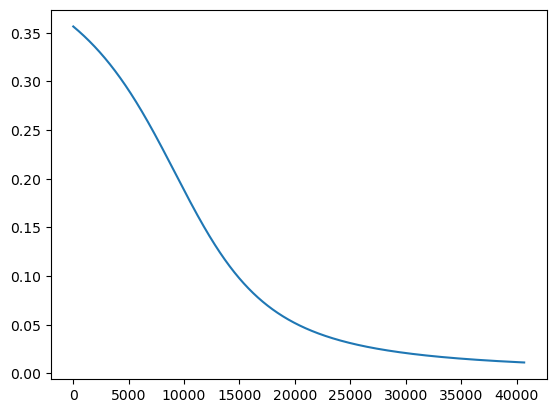

(array([ 0.18578771, -0.74263687]), array([-1.31212289]))

In [52]:
artificial_nueral(inputs ,weight ,bias ,real_output  ,40690)

### implimentation of example gived in gmail (Exercice suit part 1)

In [53]:
inputs = np.array([
    [0 , 3],
    [1 , 1.5],
    [1 , 4],
    [1.5 , 2.5],
    [2 , 2.5],
    [3 , 3.5],
    [3.5 , 3.25],
    [4 , 3],
    [4 , 4],
    [5 , 4],
    [1 , 1],
    [2 , 0.5],
    [2 , 2],
    [3 , 1.5],
    [3 , 2.75],
    [4 , 1],
    [4 , 2.5],
    [4.5 , 3],
    [5 , 1],
    [5 , 2.25],
    ]
    )

weight = np.array([0 , 1])

bias = np.array([-2])

real_output = np.array([
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    1,
    1,
    1,
    1,
    1,
    1,
    1,
    1,
    1,
    1,
])

inputs.shape , weight.shape , bias , real_output.shape

((20, 2), (2,), array([-2]), (20,))

In [54]:
def error(otput , real_output):
    return np.sqrt(np.square(np.subtract(otput, real_output)).mean())

In [58]:
def artificial_nueral(inputs , weight , bias , real_output , epoch_number =60 , learning_rate = 0.001):
    cost = []

    for i in range(epoch_number):
        predicted_output = activation(model(inputs , weight , bias))
        cost.append(error(predicted_output , real_output ))
        dw , db = gradient(inputs , weight , bias ,predicted_output , real_output)
        weight , bias = update(dw ,db ,weight ,bias ,learning_rate)
    plt.plot(cost)
    plt.show()
    return weight ,bias


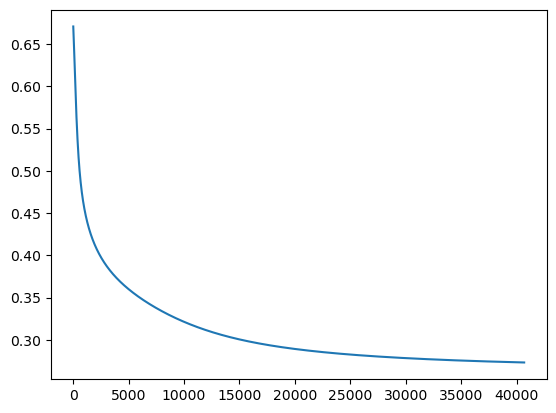

In [59]:
w , b =artificial_nueral(inputs ,weight ,bias ,real_output ,40690)

In [57]:
print("w=",w)
print("b=",b)

w= [ 1.66155531 -3.04932661]
b= [2.69627146]
